# Muhamad Azmi Rizkifar (1301218586)
# IFX-45-GAB

In [ ]:
# Import library
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import plotly.express as px
!pip install -U kaleido
import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploratory Data Analysis

In [ ]:
# Baca dataset dan tampilkan 5 data pertama
country_data = pd.read_csv('https://raw.githubusercontent.com/azmirizkifar20/Machine-Learning-K-Means-Clustering/main/Datasets/Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [ ]:
# show description per feature
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [ ]:
# cek jumlah baris dan kolom
country_data.shape

(167, 10)

In [ ]:
# getting information of the data
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


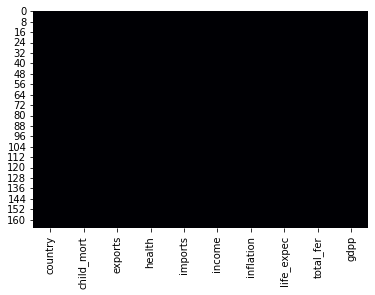

In [ ]:
# check the number of missing values per column
print(country_data.isnull().sum())

# Mencari data null dengan memplot data menggunakan heatmap
sns.heatmap(country_data.isnull(), cmap = 'magma', cbar = False);

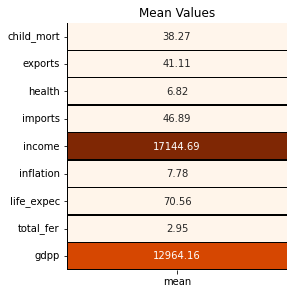

In [ ]:
# Menampilkan data rata-rata per fitur dengan menggunakan heatmap untuk memisahkan rata-rata yang tinggi
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

plt.subplot(1,1,1)
sns.heatmap(country_data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

In [ ]:
# Dari hasil analisis data diatas, terdapat 10 fitur yang dimana :
# terdapat 1 fitur dengan data categorical dan 9 data numerical
col = list(country_data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]

print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


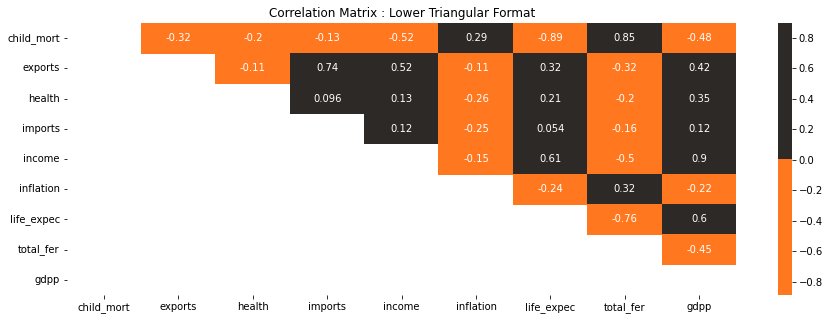

In [ ]:
# Pembuatan correlation matrix untuk peninjauan keterkaitan data/fitur
lt = np.tril(country_data.corr())
colors = ['#FF781F','#2D2926']

fig,ax = plt.subplots(figsize = (15,5))
sns.heatmap(country_data.corr(),cmap = colors, annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');



Untuk dataset ini, dikarenakan fiturnya sedikit, maka dilakukan pengecekan manual pada datasetnya.

Beberapa fitur pada dasarnya berasal dari kategori yang sama dan memiliki keterkaitan terhadap fitur lainnya dari kategori yang berbeda. Hal ini bisa dibuktikan dengan :
1. Kenaikan nilai export meningkatkan nilai import, income, dan gdpp.
2. Kenaikan nilai child_mort terjadi ketika nilai inflasi dan total_fer meningkat.
3. Nilai life_expec yang tinggi menampilkan total_fer yang rendah dan gdpp yang tinggi menyebabkan banyak pengeluaran untuk kesehatan (health).







# Tahap Pre-Process

Berdasarkan kesimpulan diatas, beberapa fitur berasal dari katageori yang sama karena memiliki keterkaitan dengan fitur lainnya. oleh karena itu, saya membagi kategori tersebut menjadi 3 dengan keterangan:


*   kesehatan (health): child_mort, health, life_expec, total_fer
*   perdagangan (trade): import, export
*   keuangan (finance): income, inflation, gdpp



In [ ]:
process_data = pd.DataFrame()
process_data['health'] = (country_data['child_mort'] / country_data['child_mort'].mean()) + (country_data['health'] / country_data['health'].mean()) + (country_data['life_expec'] / country_data['life_expec'].mean()) + (country_data['total_fer'] / country_data['total_fer'].mean())
process_data['trade'] = (country_data['imports'] / country_data['imports'].mean()) + (country_data['exports'] / country_data['exports'].mean())
process_data['finance'] = (country_data['income'] / country_data['income'].mean()) + (country_data['inflation'] / country_data['inflation'].mean()) + (country_data['gdpp'] / country_data['gdpp'].mean())

process_data.head()

,health,trade,finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


Dilakukan scaling fitur karena machine learning hanya memperlakukan nilai input sebagai angka sederhana dan tidak memahami satuan nilai fitur. 

Dilakukan **normalisasi** untuk fitur yang datanya tidak menampilkan distribusi normal.

In [ ]:
mms = MinMaxScaler() # Normalization

process_data['health'] = mms.fit_transform(process_data[['health']])
process_data['trade'] = mms.fit_transform(process_data[['trade']])
process_data['finance'] = mms.fit_transform(process_data[['finance']])

process_data.insert(loc = 0, value = list(country_data['country']), column = 'country')
process_data.head()

,country,health,trade,finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


In [ ]:
# Define data untuk dilakukan fitting (ignore categorical features)
process_data_model = process_data.drop(columns = ['country']).values

# K-Mean Cluster

Digunakan Elbow Method untuk menentukan jumlah nilai k sebagai hyperparameter algoritma k-means.

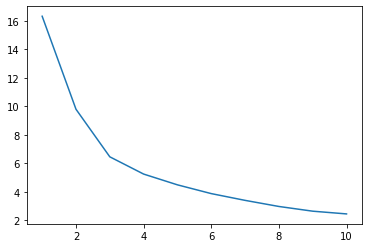

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(process_data_model)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [ ]:
class K_Means:
  def __init__(self, k=2, tol=0.001, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self,data):
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i] = data[i]

    for i in range(self.max_iter):
      self.classifications = {}

      for i in range(self.k):
        self.classifications[i] = []

      for featureset in data:
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      prev_centroids = dict(self.centroids)

      for classification in self.classifications:
        self.centroids[classification] = np.average(self.classifications[classification],axis=0)

      optimized = True

      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
          print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
          optimized = False

      if optimized:
        break

In [ ]:
# Inisiasi model
model = K_Means(k=3)
model.fit(process_data_model)

70.96525645753786
63.3610419030481
80.50264775316064
26.098108924784377
24.805246531312598
3.960054474003082
14.892885076047737
12.037677054581014
2.25952930827778
11.589575609123688
1.5793096725679594
5.190866398791849
1.0625116954523595
2.158144136808811


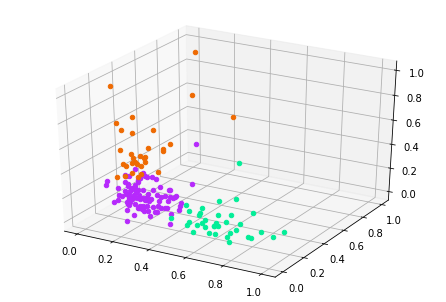

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
colors = ['#02ee98','#b629fc', '#ee6a02']

# Plot hasil clustering
for classification in model.classifications:
  color = colors[classification]
  for featureset in model.classifications[classification]:
    ax.scatter(featureset[0], featureset[1], featureset[2], color=color)
        
plt.show()

In [ ]:
model.centroids

{0: array([0.63055841, 0.18653481, 0.08930844]),
 1: array([0.18523165, 0.23585981, 0.13945257]),
 2: array([0.16519724, 0.27563471, 0.51548174])}

# Penentuan class

In [ ]:
# Get data labels untuk penentuan class
labels = []

for data in process_data_model:
  for label in model.classifications[0]:
    if (data == label).all():
      labels.append(0)
  
  for label in model.classifications[1]:
    if (data == label).all():
      labels.append(1)
  
  for label in model.classifications[2]:
    if (data == label).all():
      labels.append(2)

process_data['class'] = labels
country_data['class'] = labels

print('Class based on country data:')
print(country_data)

Class based on country data:
                 country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  class  
0         9.44       56.20  

Jika nilai income rendah dan child_mort (kematian anak) tinggi adalah tanda bahwa negara tersebut terbelakang secara ekonomi, maka digunakan fitur income dan child_mort sebagai label untuk gambar boxplot dibawah

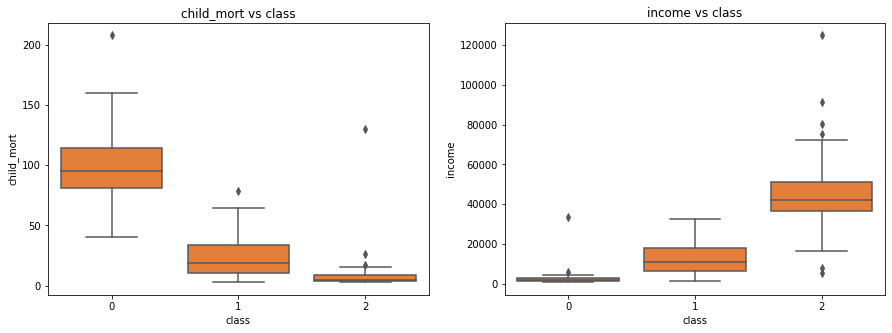

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'class', y = 'child_mort', data  = country_data, color = '#FF781F');
plt.title('child_mort vs class')

plt.subplot(1,2,2)
sns.boxplot(x = 'class', y = 'income', data  = country_data, color = '#FF781F');
plt.title('income vs class')

plt.show()

Dari hasil plot diatas, disimpulkan:

*   0 : Membutuhkan bantuan
*   1 : Mungkin butuh bantuan
*   2 : Tidak membutuhkan bantuan



In [ ]:
process_data['class'].loc[process_data['class'] == 0] = 'Membutuhkan bantuan'
process_data['class'].loc[process_data['class'] == 1] = 'Mungkin butuh bantuan'
process_data['class'].loc[process_data['class'] == 2] = 'Tidak membutuhkan bantuan'

print(process_data)

                 country  health  trade  finance                      class
0            Afghanistan    0.63   0.14     0.08        Membutuhkan bantuan
1                Albania    0.13   0.20     0.09      Mungkin butuh bantuan
2                Algeria    0.18   0.19     0.21      Mungkin butuh bantuan
3                 Angola    0.66   0.28     0.24        Membutuhkan bantuan
4    Antigua and Barbuda    0.12   0.28     0.15      Mungkin butuh bantuan
..                   ...     ...    ...      ...                        ...
162              Vanuatu    0.22   0.26     0.04      Mungkin butuh bantuan
163            Venezuela    0.13   0.12     0.56  Tidak membutuhkan bantuan
164              Vietnam    0.17   0.40     0.12      Mungkin butuh bantuan
165                Yemen    0.40   0.17     0.23      Mungkin butuh bantuan
166               Zambia    0.53   0.18     0.13        Membutuhkan bantuan

[167 rows x 5 columns]


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Pembuatan 
fig = px.choropleth(process_data[['country','class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = process_data['class'],  
                    color_discrete_map = {
                        'Membutuhkan bantuan':'Red',
                        'Tidak membutuhkan bantuan':'Green',
                        'Mungkin butuh bantuan':'Orange'
                    })
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
print('Jumlah negara yang membutuhkan bantuan => {} negara'.format(process_data['class'].value_counts()[0]))
print('Jumlah negara yang mungkin butuh bantuan => {} negara'.format(process_data['class'].value_counts()[2]))
print('Jumlah negara yang tidak membutuhkan bantuan => {} negara'.format(process_data['class'].value_counts()[1]))

Jumlah negara yang membutuhkan bantuan => 99 negara
Jumlah negara yang mungkin butuh bantuan => 32 negara
Jumlah negara yang tidak membutuhkan bantuan => 36 negara


# Save hasil cluster ke xlsx

In [ ]:
country_data['labels'] = process_data['class']
country_data.to_excel('output.xlsx', index=False)